# Problem 2

$$
\newcommand{\erf}[1]{\text{erf}(#1)}
\erf x = \frac{2}{\sqrt{\pi}}\int_0^\pi e^{-t^2}
$$

## a

Finding the first 5 derivatives of $\text{erf}(x)$ evaluated at $x=0$:

$$
\renewcommand{\erf}[1]{\text{erf}(#1)}
\newcommand{\derf}[2]{\text{erf}^{(#1)}(#2)}
\begin{align*}
    \erf x &= \frac{2}{\sqrt \pi} \int_0^xe^{-t^2}\,dt \implies \erf 0 = 0\\
    \frac{d}{dx}\int_a^xf(t)\,dt &= f(x) \quad (\text{fundamental theorem of calculus})\\
    \text{erf}'(x) &= \frac{2}{\sqrt \pi}e^{-x^2} \implies \text{erf}'(0) = \frac{2}{\sqrt \pi}\\
    \derf 2x &= -\frac{4x}{\sqrt \pi} e^{-x^2} \implies \derf 20 = 0\\
    \derf 3x &= -\frac{4}{\sqrt \pi}e^{-x^2} + \frac{16}{\sqrt \pi}xe^{-x^2} \implies \derf 30 = -\frac{4}{\sqrt \pi}\\
    \derf 4x &= \frac{8}{\sqrt \pi}xe^{-x^2} + \frac{16}{\sqrt \pi}xe^{-x^2} - \frac{16}{\sqrt \pi}x^3e^{-x^2} \implies \derf 40=0\\
    \derf 5x &= \frac{8}{\sqrt \pi}e^{-x^2} - \frac{16}{\sqrt \pi}x^2e^{-x^2} + \frac{16}{\sqrt \pi}e^{-x^2} - \frac{32}{\sqrt \pi}x^2e^{-x^2} - \frac{48}{\sqrt \pi}x^2e^{-x^2} + \frac{32}{\sqrt \pi}x^4e^{-x^2} \implies \derf 50 = \frac{8}{\sqrt \pi} + \frac{16}{\sqrt \pi} = \frac{24}{\sqrt \pi}
\end{align*}
$$

This means we can construct a Taylor-polynomial of degree 5, even an Maclauring polynomial, that is the special case where the factor $c$ in the Taylor polynomial is 0:

$$
\begin{align*}
    T_5(x) &= \erf0 + \text{erf}'(0)(x-0) + \frac{\derf 20}{2!}(x-0)^2 + \frac{\derf 30}{3!}(x-0)^3 + \frac{\derf 40}{4!}(x-0)^4 + \frac{\derf 50}{5!}(x-0)^5\\
    T_5(x) &= \frac{2}{\sqrt \pi}x - \frac{4}{6\sqrt \pi}x^3 + \frac{1}{5\sqrt \pi}x^5
\end{align*}
$$

We see from the derivatives that the multiplicity of $\text{erf}$ for the root $x=0$ is 1.

## b

Given points $(x_i, y_i), i=1,\dots,5$, where $x_1 = 0, x_2=\frac12, x_3=1,x_4=\frac32,x_5=2$, and $y_i = e^{-x_i^2}$:

In [13]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0, 2.5, 0.5)
y = np.exp(-x**2)
res = np.hstack((x[:,None], y[:,None]))
print(res)

[[0.         1.        ]
 [0.5        0.77880078]
 [1.         0.36787944]
 [1.5        0.10539922]
 [2.         0.01831564]]


Are now to find a degree 4 interpolating polynomial for the provided points. I am going to use Newtons divided differences

coefficients: [ 1.         -0.44239843 -0.37944425  0.45088433 -0.20747183]


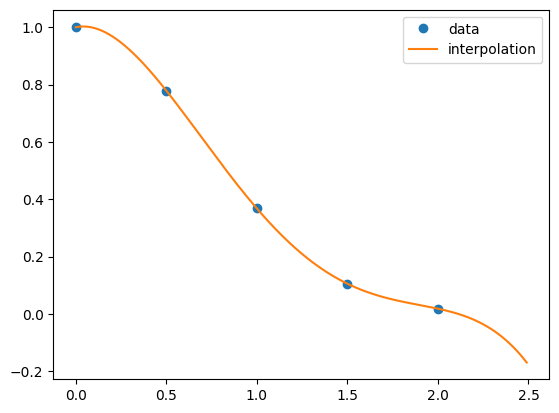

In [14]:
div_diff = lambda x_j, x_i, y_j, y_i: (y_i - y_j) / (x_i - x_j)

results = np.zeros((x.shape[0], x.shape[0] + 1))
results[:, :2] = res

results[0, 2] = div_diff(results[0, 0], results[1, 0], results[0, 1], results[1, 1])
results[1, 2] = div_diff(results[1, 0], results[2, 0], results[1, 1], results[2, 1])
results[2, 2] = div_diff(results[2, 0], results[3, 0], results[2, 1], results[3, 1])
results[3, 2] = div_diff(results[3, 0], results[4, 0], results[3, 1], results[4, 1])

results[0, 3] = div_diff(results[0, 0], results[2, 0], results[0, 2], results[1, 2])
results[1, 3] = div_diff(results[1, 0], results[3, 0], results[1, 2], results[2, 2])
results[2, 3] = div_diff(results[2, 0], results[4, 0], results[2, 2], results[3, 2])

results[0, 4] = div_diff(results[0, 0], results[3, 0], results[0, 3], results[1, 3])
results[1, 4] = div_diff(results[1, 0], results[4, 0], results[1, 3], results[2, 3])

results[0, 5] = div_diff(results[0, 0], results[4, 0], results[0, 4], results[1, 4])

coefficients = results[0, 1:]

print(f"coefficients: {coefficients}")

inter_poly = lambda x: results[0, 1] + results[0, 2] * (x - results[0, 0]) + results[0, 3] * (x - results[0, 0]) * (x - results[1, 0]) + results[0, 4] * (x - results[0, 0]) * (x - results[1, 0]) * (x - results[2, 0]) + results[0, 5] * (x - results[0, 0]) * (x - results[1, 0]) * (x - results[2, 0]) * (x - results[3, 0])

interp_x = np.arange(0, 2.5, 0.01)
interp_y = np.array([inter_poly(int_x) for int_x in interp_x])

plt.plot(x, y, 'o', label='data')
plt.plot(interp_x, interp_y, label='interpolation')
plt.legend()
plt.show()

In the above python cell I have computed the coefficients of the polynomial that interpolates the given points. And verified that the function does interpolate the points.

The anti-derivative of $P_4(x)$ we can find as:

$$
\begin{align*}
    P_4(x) &= c_1 +c_2(x-x_1) + c_3(x-x_1)(x-x_2)+ c_4(x-x_1)(x-x_2)(x-x_3) \\&+ c_5(x-x_1)(x-x_2)(x-x_3)(x-x_4), \quad \text{using } x_1 = 0, x_3 = 1, c_1=1\\
    &= 1 + c_2x + c_3(x^2-x_2x) + c_4(x^3 - (x_3+x_2)x^2+x_1x_3x)\\
    &+ c_5(x^4 - (x_3 + x_2 + x_4)x^3 + (x_2x_3 + x_3x_4 + x_2x_4 - x_2x_3x_4)x^2)
\end{align*}
$$

Then we may integrate this:

$$
\begin{align*}
    P_5(x) &= \int_0^xP_4(t)dt\\
    &= x+\frac{c_2}{2}x^2 + \frac{c_3}{3}x^3 - x_2\frac{c_3}{2}x^2 + \frac{c_4}{4}x^4 -(x_3+x_2)\frac{c_4}{3}x^3\\
    &+ x_1x_3\frac{c_4}{2}x^2 + \frac{c_5}{5}x^5 - (x_3+x_2+x_4)\frac{c_5}{4}x^4\\
    &+ (x_2x_3 + x_3x_4 + x_2x_4 - x_2x_3x_4)\frac{c_5}{3}x^3
\end{align*}
$$

In [15]:
x1, x2, x3, x4, x5 = x
c1, c2, c3, c4, c5 = coefficients

x_pow_5 = c5/5
x_pow_4 = (c4/4 - (x4 + x3 + x2)*c5/4)
x_pow_3 = (c3/3 - (x3 + x2)*c4/3 + (x3*x2 + x3*x4 + x2*x4 - x2*x3*x4)*c5/3)
x_pow_2 = (c2/2 - x2 * c3/2 + x1*x3 * c4/2)
x_pow_1 = 1

print(f"P_5(x) = {x_pow_5:.5f}x^5 + {x_pow_4:.5f}x^4 + {x_pow_3:.5f}x^3 + {x_pow_2:.5f}x^2 + {x_pow_1:.5f}x")

P_5(x) = -0.04149x^5 + 0.26832x^4 + -0.49024x^3 + -0.12634x^2 + 1.00000x


$$
P_5(x) = -0.04149x^5 + 0.26832x^4 -0.49024x^3 -0.12634x^2 + x
$$

I do believe this would be a good approximation for $\text{erf}(x)$ on the interval $[x_1, x_5]$, however outside this interval, I would not think so. The reason I think it is a good approximation is that we first find a function $f$ and use a integral to mimic the $\text{erf}(x)$.